Simple case of Deutsch's algorithm where $f(x)$ is balanced, that is $$f(x) = 1 \iff x \ne 1$$

Running the program on the IBM qasm simulator simulates the runtime and will return a 100% probability. Runnig the circuit on ibmqx4 will return the actual probabilities.

In [35]:
import matplotlib
%matplotlib inline
# matplotlib.use('Qt5Agg')
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumProgram
from qiskit.tools.visualization import *
import Qconfig

backend = 'ibmqx_qasm_simulator'

Q = QuantumProgram()
Q.set_api(Qconfig.APItoken,Qconfig.config["url"])
q = Q.create_quantum_register('q', 3)
c = Q.create_classical_register('c', 3)
C = Q.create_circuit('C',[q],[c])

In [36]:
C.h(q)
C.h(q[2])
C.z(q[0])
C.cx(q[2],q[1])
C.h(q[2])
C.h(q)
C.measure(q,c)
# C.measure(q[0],c[0])

In [30]:
# r = Q.execute('C',backend=backend,shots=1024,silent=False)
# plot_histogram(r.get_counts("C"))


running on backend: local_qasm_simulator


In [38]:
r = Q.execute("C",
              max_credits=3,
              wait=10,
              timeout=240,
              silent=False,
              backend="ibmqx4",
              shots=1024)

running on backend: ibmqx4
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)
status = RUNNING (30 seconds)
status = RUNNING (40 seconds)
status = RUNNING (50 seconds)
status = RUNNING (60 seconds)
status = RUNNING (70 seconds)
status = RUNNING (80 seconds)
status = RUNNING (90 seconds)
status = RUNNING (100 seconds)
status = RUNNING (110 seconds)
status = RUNNING (120 seconds)
status = RUNNING (130 seconds)
status = RUNNING (140 seconds)
status = RUNNING (150 seconds)
status = RUNNING (160 seconds)
status = RUNNING (170 seconds)
status = RUNNING (180 seconds)
status = RUNNING (190 seconds)


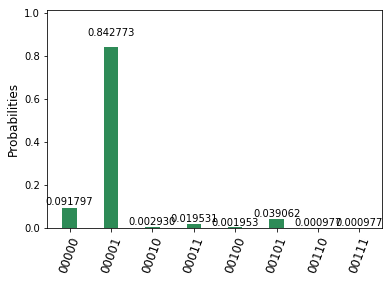

In [41]:
plot_histogram(r.get_counts('C'))